The cold plasma dielectric tensor is defined as :
$$
\mathbf{K}
=
\left(
\begin{array}{ccc}
S & j D & 0 \\
-j D & S & 0 \\
0 & 0 & P
\end{array}
\right)
$$
where
$$
\begin{eqnarray}
S &=& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
D &=& \sum_s \frac{\Omega_{c,s}}{\omega} \frac{\omega_{p,s}^2}{\omega^2 - \Omega_{c,s}^2} \\
P &=& 1 - \sum_s \frac{\omega_{p,s}^2}{\omega^2}
\end{eqnarray}
$$

where $\omega$ is the RF angular frequency ($\omega=2\pi f$) and $\Omega_{c,s}$, $\omega_{p,s}$ are the cyclotron and the plasma  angular frequencies respectively for the plasma species $s$. 

In [1]:
import sys
# import the (git version of) PlasmaPy module which is not my global python path
sys.path.append('../../PlasmaPy')
from plasmapy.physics.dielectric import cold_plasma_permittivity_SDP
from plasmapy.physics import plasma_frequency, gyrofrequency
from astropy import units as u
from plasmapy.constants import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, c, epsilon_0, mu_0, m_e, m_p, pi

In [2]:
# RF angular Frequency
omega_RF = 2*pi*50e6*(u.rad/u.s) # pay attention to the unit in rad/s!
# Electron and ion density
ns = [1e18, 1e18]/u.m**3
# Magnetic field
B0 = 2*u.T

S, D, P = cold_plasma_permittivity_SDP(B=B0, species=['e', 'D+'], n=ns, omega=omega_RF)
print(S, D, P)

-8.661091784715325 31.754325333352067 -32254.33974279528


In [3]:
# Plot the S,D,P coefficients vs density at the edge (supposed constant first), for various magnetic field
ns = np.logspace(17, 19, 50)/u.m**3 
Bs = [2, 4]*u.T

In [4]:
S_B1, D_B1, P_B1 = cold_plasma_permittivity_SDP(B=Bs[0], species=['e', 'D+'], n=[ns, ns], omega=omega_RF)
S_B2, D_B2, P_B2 = cold_plasma_permittivity_SDP(B=Bs[1], species=['e', 'D+'], n=[ns, ns], omega=omega_RF)

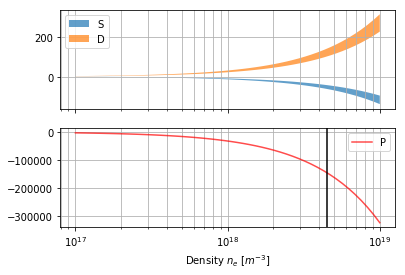

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].fill_between(ns, S_B1, S_B2, alpha=0.7)
ax[0].fill_between(ns, D_B1, D_B2, alpha=0.7)
ax[0].set_xscale('log')
ax[0].legend( ['S', 'D'], loc='upper left')
ax[0].grid(True)
ax[0].grid(True, which='minor')

ax[1].plot(ns, P_B1, alpha=0.7, color='r')
ax[1].set_xscale('log')
ax[1].legend(['P'])
ax[1].grid(True)
ax[1].grid(True, which='minor')
ax[1].set_xlabel('Density $n_e$ [$m^{-3}$]')
ax[1].axvline(4.5e18, color='k')

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


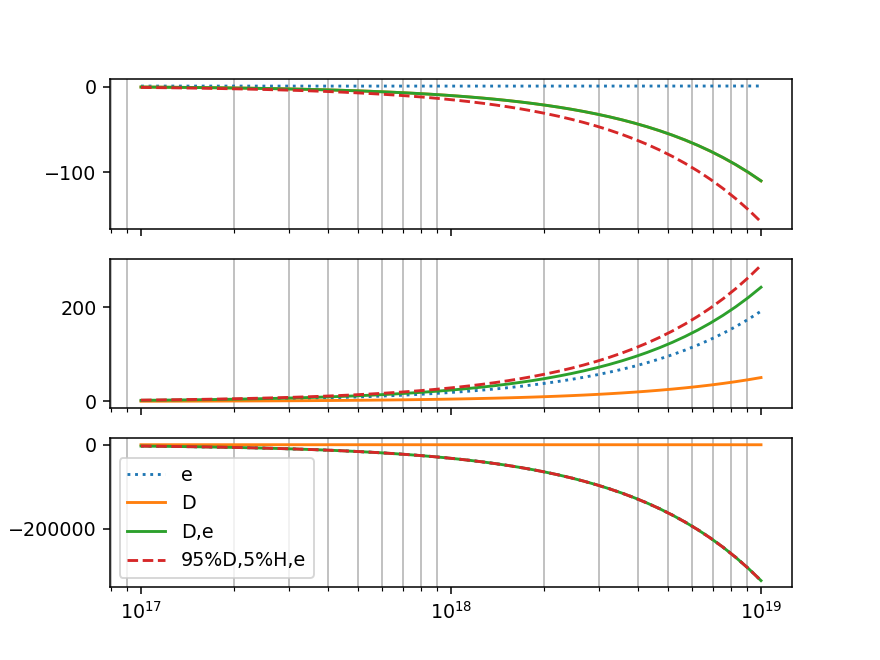

In [7]:
# what difference in the ICRF range for S, D, P depending if we consider a single species plasma or a mixture ?
omega_RF = 50e6*2*pi*u.rad/u.s
fig, ax = plt.subplots(3, 1, sharex=True)

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['e'], n=[ns], omega=omega_RF)
ax[0].plot(ns, S, ':')
ax[1].plot(ns, D, ':')
ax[2].plot(ns, P, ':')

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+'], n=[ns], omega=omega_RF)
ax[0].plot(ns, S)
ax[1].plot(ns, D)
ax[2].plot(ns, P)

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'e'], n=[ns, ns], omega=omega_RF)
ax[0].plot(ns, S)
ax[1].plot(ns, D)
ax[2].plot(ns, P)

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ns, 0.05*ns, ns], omega=omega_RF)
ax[0].plot(ns, S, '--')
ax[1].plot(ns, D, '--')
ax[2].plot(ns, P, '--')

[a.set_xscale('log') for a in ax]
[a.grid(True, which='minor') for a in ax]
ax[2].legend(('e', 'D', 'D,e', '95%D,5%H,e'))



<IPython.core.display.Javascript object>


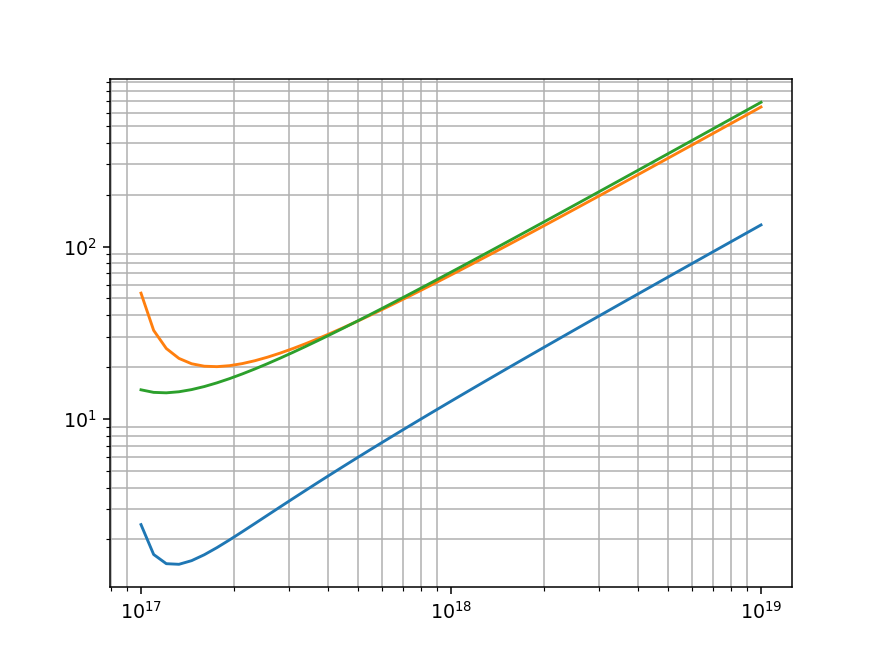

In [8]:

k0 = omega_RF/c
kz = 0

fig, ax = plt.subplots()

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+'], n=[ns], omega=omega_RF)
K_D = S + k0**2 * D**2 / (k0**2 * S - kz**2)
ax.plot(ns, abs(K_D))

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'e'], n=[ns, ns], omega=omega_RF)
K_D = S + k0**2 * D**2 / (k0**2 * S - kz**2)
ax.plot(ns, abs(K_D))

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ns, 0.05*ns, ns], omega=omega_RF)
K_D = S + k0**2 * D**2 / (k0**2 * S - kz**2)
ax.plot(ns, abs(K_D))

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True, which='minor')

In [9]:
# S, D, P from PlasmaPy
ne = 10e18/u.m**3
B0 = 3*u.T
omega_RF = 50e6*2*pi*u.rad/u.s
# results a re correct wrt ANTITER, except minus sign for D
S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ne, 0.05*ne, ne], omega=omega_RF)
print(S, D, P)

-158.11626630805776 289.3803689704036 -322556.7842287811


In [10]:
# Calcul "à la main"
omega_rf = 2*pi*50e6
ne = 1e18
B0 = 3.0

omega_pe = np.sqrt(ne*e**2/m_e/epsilon_0)
omega_pi_D = np.sqrt(0.95*ne*e**2/(2*m_p)/epsilon_0) 
omega_pi_H = np.sqrt(0.05*ne*e**2/m_p/epsilon_0) 

omega_ce = - e*B0/m_e
omega_ci_D = + 1/2*e*B0/m_p
omega_ci_H = + 1/1*e*B0/m_p



S = 1 - omega_pe**2/(omega_rf**2-omega_ce**2) \
    - omega_pi_D**2/(omega_rf**2-omega_ci_D**2) \
    - omega_pi_H**2/(omega_rf**2-omega_ci_H**2)
print(S)

D = - omega_pi_D**2 / (omega_rf**2 - omega_ci_D**2)*(omega_rf/omega_ci_D) \
    - omega_pi_H**2 / (omega_rf**2 - omega_ci_H**2)*(omega_rf/omega_ci_H) \
    
print(D)

-14.914098978794787
-28.942410619284416


In [73]:
# LH range of parameters
omega_rf = 2*pi*3.7e9*u.rad/u.s
ne = 2*3.7e17/u.m**3
B0 = 3.0*u.T

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ne, 0.05*ne, ne], omega=omega_rf)
print(S, D, P)

1.0072291020291817 0.1923771449159445 -3.3588889760646095


In [76]:
# A good approximation is 
1 - plasma_frequency(ne, 'e')**2/omega_rf**2


<Quantity -3.35764248>

<IPython.core.display.Javascript object>


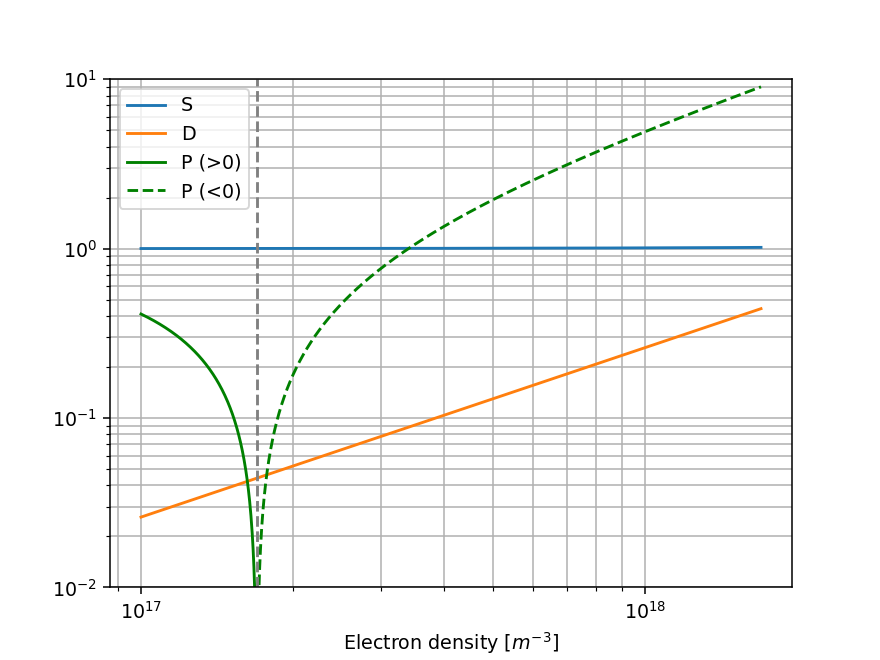

In [61]:
# S, D, P against density for LH parameters
ne = np.linspace(1e17, 10*1.7e17, 5001)/u.m**3

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ne, 0.05*ne, ne], omega=omega_rf)

fig, ax = plt.subplots()
ax.plot(ne, S)
ax.plot(ne, D)
ax.plot(ne, +P, ls='-', color='g')
ax.plot(ne, -P, ls='--', color='g')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Electron density [$m^{-3}$]')
ax.grid(True)
ax.grid(True, which='minor')
ax.legend(('S', 'D', 'P (>0)', 'P (<0)'))
ax.axvline(1.7e17, color='gray', ls='--')
ax.set_ylim(1e-2, 10)
fig.savefig('LH_SDP.png', dpi=200)

<IPython.core.display.Javascript object>


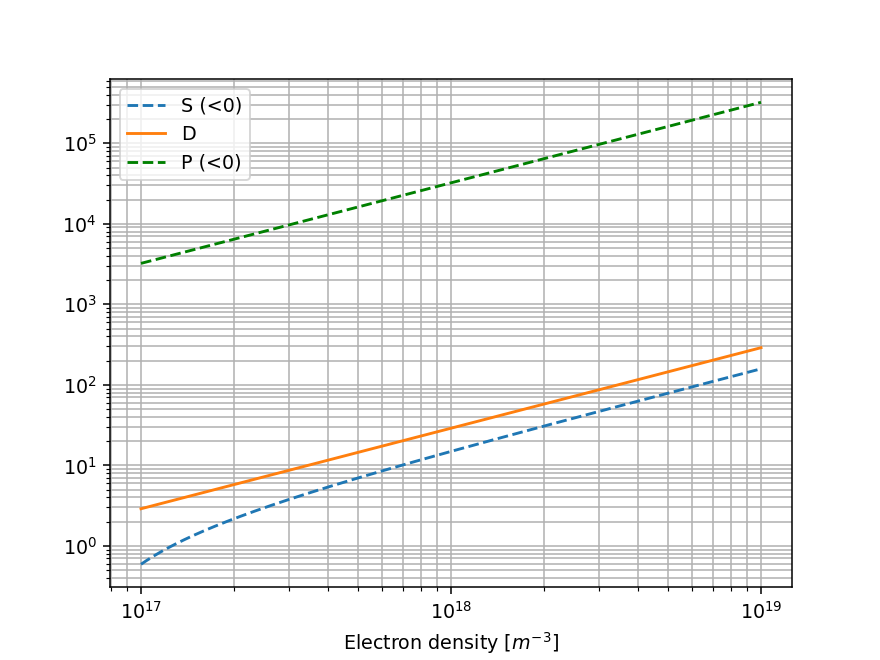

In [71]:
# S, D, P against density for IC parameters
omega_rf = 2*pi*50e6*u.rad/u.s
ne = np.linspace(1e17, 10e18, 5001)/u.m**3
B0 = 3*u.T

S, D, P = cold_plasma_permittivity_SDP(B=3*u.T, species=['D+', 'H+', 'e'], n=[0.95*ne, 0.05*ne, ne], omega=omega_rf)

fig, ax = plt.subplots()
ax.plot(ne, -S, ls='--')
ax.plot(ne, D)
ax.plot(ne, -P, ls='--', color='g')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Electron density [$m^{-3}$]')
ax.grid(True)
ax.grid(True, which='minor')
ax.legend(('S (<0)', 'D', 'P (<0)'))
fig.savefig('IC_SDP.png', dpi=200)

# Equivalent Dielectric

Here we use the formula proposed by A.Messiaen et al. (Plasma Phys. Control. Fusion 53 2011 085020), to get a dielectric permittivity $K_D$ somewhat equivalent to a cold plasma of density $n_e$ :
$$
K_D = 1 + \frac{\omega_{pi}^2}{\omega \omega_{ci} + \omega_{ci}^2}
$$

In [11]:
def K_D(n_e=1e18/u.m**3, B_T=3*u.T, f=50e6/u.s):
    omega_pi = plasma_frequency(n_e, particle='D+')
    omega_ci = gyrofrequency(B_T, particle='D+', signed=True)
    omega = 2*np.pi * f * u.rad
    return 1 + omega_pi**2 / (omega*omega_ci + omega_ci**2)

In [12]:
n_e = 5e18 /u.m**3 # m^-3
B_T = 3 *u.T # T
f = 50e6 /u.s # Hz

K_D(n_e=n_e, B_T=B_T, f=f)

<Quantity 66.86085133>